# Capstone project week 3

## Step 1 - download data from url

In [5]:
import pandas as pd
## look at US zip data
tab = pd.read_csv('https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/download/?format=csv&timezone=Europe/Minsk&use_labels_for_header=true&csv_separator=%3B',sep=";")
tab.head()
wt = tab[['City','geopoint']].groupby(['City'])['geopoint'].count().sort_values(ascending=False)
wt#.columns.values
#wt.sort_values(by='count')
### extract information for Denver
den_data=tab.loc[tab['City']=='Denver',['Zip','Latitude','Longitude']]
den_data.head()

,Zip,Latitude,Longitude
186,80235,39.648328,-105.084310
243,80202,39.751586,-104.996990
584,80230,39.721763,-104.896270
787,64441,40.386181,-94.289750
834,80266,39.747179,-104.991511
1090,28037,35.501448,-81.004120


## Step 2 - look at the map

In [1]:

### do the map
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.0.1               |             py_0         575 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

In [9]:
map_denver = folium.Map(location=[ 39.742043,  -104.991531], zoom_start=11)
map_denver

In [10]:
# add markers to map
for lat, lng, label in zip(den_data['Latitude'], den_data['Longitude'], den_data['Zip']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_denver)  
    
map_denver

## Step 3 Make a forsquare request and extract the data

In [11]:
CLIENT_ID = '1S55TLM4HKPAUAX2APKQSAARFGXHBOPQL412PDV4HBFCTU55' # your Foursquare ID
CLIENT_SECRET = 'HSCKQUGRN5QDZVYZXG405G1UDW1WTVH45QMCMIYVRQYZXJ5O' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
CATEGORY="4bf58dd8d48988d1e5931735"
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
from pandas.io.json import json_normalize

Your credentails:
CLIENT_ID: 1S55TLM4HKPAUAX2APKQSAARFGXHBOPQL412PDV4HBFCTU55
CLIENT_SECRET:HSCKQUGRN5QDZVYZXG405G1UDW1WTVH45QMCMIYVRQYZXJ5O


In [12]:
## request for restaraunts
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    not_found = 0
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId=4d4b7105d754a06374d81259'.format(  #4bf58dd8d48988d1fa931735 4bf58dd8d48988d1e5931735
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
               # v['venue']['postalCode'],
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        except:
            not_found +=1

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                 # 'postalCode',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
## request for hotels
def getNearbyVenues_hot(names, latitudes, longitudes, radius=500):
    not_found = 0
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId=4bf58dd8d48988d1fa931735'.format(  #4bf58dd8d48988d1fa931735 4bf58dd8d48988d1e5931735
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
               # v['venue']['postalCode'],
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        except:
            not_found +=1

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                 # 'postalCode',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
import requests
den_venues_rest = getNearbyVenues(names=den_data['Zip'],
                                        latitudes=den_data['Latitude'],
                                        longitudes=den_data['Longitude']
                                       )
den_venues_hot = getNearbyVenues_hot(names=den_data['Zip'],
                                        latitudes=den_data['Latitude'],
                                        longitudes=den_data['Longitude']
                                       )

80235
80202
80230
64441
80266
28037
80238
80216
80232
80221
80247
80239
80219
80237
80214
80220
80263
80265
80203
80201
80260
80218
80295
80243
46926
80229
80210
80231
80264
80224
80246
80270
80294
80207
80225
80273
17517
80215
80255
80212
80236
80209
80244
80274
80271
41215
80211
80223
80217
80222
80279
80291
80250
80254
80290
80208
50622
80261
80252
80227
80241
80293
80248
80299
80206
80204
80249
80251
80281
80233
80275
80259
12421
80234
80280
80257
80205
80256
80226
80262
80228
80292
80235
80202
80230
64441
80266
28037
80238
80216
80232
80221
80247
80239
80219
80237
80214
80220
80263
80265
80203
80201
80260
80218
80295
80243
46926
80229
80210
80231
80264
80224
80246
80270
80294
80207
80225
80273
17517
80215
80255
80212
80236
80209
80244
80274
80271
41215
80211
80223
80217
80222
80279
80291
80250
80254
80290
80208
50622
80261
80252
80227
80241
80293
80248
80299
80206
80204
80249
80251
80281
80233
80275
80259
12421
80234
80280
80257
80205
80256
80226
80262
80228
80292


## Step 4: process and  explore the data

In [16]:
### see categories of hotels
den_venues_hot["Venue Category"].unique()

array(['Hotel', 'Bar', 'General Travel', 'Hostel', 'Hotel Pool',
       'American Restaurant', 'Bed & Breakfast',
       'Residential Building (Apartment / Condo)', 'Hotel Bar',
       'College Academic Building', 'Café', 'Pet Service', 'Resort'],
      dtype=object)

In [20]:
###  filter out Bars, pools and other categories, which are out of interest
den_venues_hot2=den_venues_hot[den_venues_hot['Venue Category'].isin(['Hotel', 'Hostel','Residential Building (Apartment / Condo)','Resort'])]
den_venues_hot2["Group"]="Hotels"
den_venues_hot2.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Group
0,80235,39.648328,-105.08431,Hampton Denver Southwest,39.648626,-105.082271,Hotel,Hotels
1,80235,39.648328,-105.08431,Comfort Suites Southwest,39.649333,-105.079389,Hotel,Hotels
2,80235,39.648328,-105.08431,Hotel Lakewood,39.648645,-105.082367,Hotel,Hotels
3,80235,39.648328,-105.08431,Quality Inn,39.649461,-105.078916,Hotel,Hotels
4,80235,39.648328,-105.08431,Quality Inn & Suites,39.649430,-105.078678,Hotel,Hotels


In [15]:
### see categories of restaraunts
den_venues_rest["Venue Category"].unique()

array(['Pizza Place', 'Mexican Restaurant', 'Fast Food Restaurant',
       'Asian Restaurant', 'Sushi Restaurant', 'Diner', 'Restaurant',
       'American Restaurant', 'Seafood Restaurant', 'Steakhouse',
       'New American Restaurant', 'Burger Joint', 'Breakfast Spot',
       'Food Truck', 'Modern European Restaurant', 'Bakery',
       'Fried Chicken Joint', 'Food', 'Sandwich Place',
       'Mongolian Restaurant', 'Taco Place', 'Italian Restaurant',
       'Bagel Shop', 'Gastropub', 'Soup Place', 'Brazilian Restaurant',
       'Deli / Bodega', 'Salad Place', 'French Restaurant', 'BBQ Joint',
       'Japanese Restaurant', 'Ramen Restaurant', 'Café', 'Snack Place',
       'Chinese Restaurant', 'Food Court', 'Greek Restaurant',
       'Noodle House', 'Vietnamese Restaurant',
       'Cajun / Creole Restaurant', 'Poke Place', 'Theme Restaurant',
       'Burrito Place', 'Middle Eastern Restaurant',
       'Mediterranean Restaurant', 'Hot Dog Joint', 'Thai Restaurant',
       'Donut Shop', 

In [18]:
## lets focus on restaraunts
den_venues_rest2= den_venues_rest[den_venues_rest["Venue Category"].str.contains("Restaurant")]
den_venues_rest2["Venue Category"].unique()
den_venues_rest2["Group"]="Restaraunts"
den_venues_rest2.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Group
1,80235,39.648328,-105.08431,El Tapatio,39.649666,-105.082113,Mexican Restaurant,Restaraunts
2,80235,39.648328,-105.08431,Taco Bell,39.645542,-105.083687,Fast Food Restaurant,Restaraunts
3,80235,39.648328,-105.08431,285 Landing Asian Bistro,39.649215,-105.080654,Asian Restaurant,Restaraunts
4,80235,39.648328,-105.08431,Eeny Meeny Sushi Roll,39.649209,-105.080641,Sushi Restaurant,Restaraunts
6,80202,39.751586,-104.99699,Milk Market,39.753198,-104.997142,Restaurant,Restaraunts


In [38]:
## bind 2 datasets for hotels and restaraunts
den_venues_all =pd.concat([den_venues_hot2, den_venues_rest2])
den_venues_all=den_venues_all.drop(['Venue Latitude', 'Venue Longitude'], axis=1)
den_venues_all["Venue Category"].unique()
den_venues_all.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Group
0,80235,39.648328,-105.08431,Hampton Denver Southwest,Hotel,Hotels
1,80235,39.648328,-105.08431,Comfort Suites Southwest,Hotel,Hotels
2,80235,39.648328,-105.08431,Hotel Lakewood,Hotel,Hotels
3,80235,39.648328,-105.08431,Quality Inn,Hotel,Hotels
4,80235,39.648328,-105.08431,Quality Inn & Suites,Hotel,Hotels


In [37]:
## what categories are the most popular
den_venues_all2 = den_venues_all[['Group','Venue Category','Venue']]
den_all_gr_tot = den_venues_all2.groupby(['Venue Category','Group']).count().reset_index()
den_all_gr_tot2 =den_all_gr_tot.sort_values(['Group','Venue'],ascending=False)
den_all_gr_tot2[den_all_gr_tot2['Group']!="Hotels"]

,Venue Category,Group,Venue
0,American Restaurant,Restaraunts,64
18,Mexican Restaurant,Restaraunts,46
14,Italian Restaurant,Restaraunts,34
27,Restaurant,Restaraunts,17
15,Japanese Restaurant,Restaraunts,12
2,Brazilian Restaurant,Restaraunts,11
9,French Restaurant,Restaraunts,11
22,New American Restaurant,Restaraunts,11
30,Sushi Restaurant,Restaraunts,11
1,Asian Restaurant,Restaraunts,10


In [75]:
den_all_gr_tot2[den_all_gr_tot2['Group']=="Hotels"]

,Venue Category,Group,Venue
12,Hotel,Hotels,254
11,Hostel,Hotels,8
25,Residential Building (Apartment / Condo),Hotels,1
26,Resort,Hotels,1


In [41]:
## count number of venues for each zip
den_venues_all3=den_venues_all[['Neighborhood', 'Group','Venue']]
den_all_gr = den_venues_all3.groupby(['Neighborhood', 'Group']).count().reset_index()
den_all_gr.head()

,Neighborhood,Group,Venue
0,50622,Restaraunts,3
1,80202,Hotels,9
2,80202,Restaraunts,18
3,80203,Hotels,4
4,80203,Restaraunts,18


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

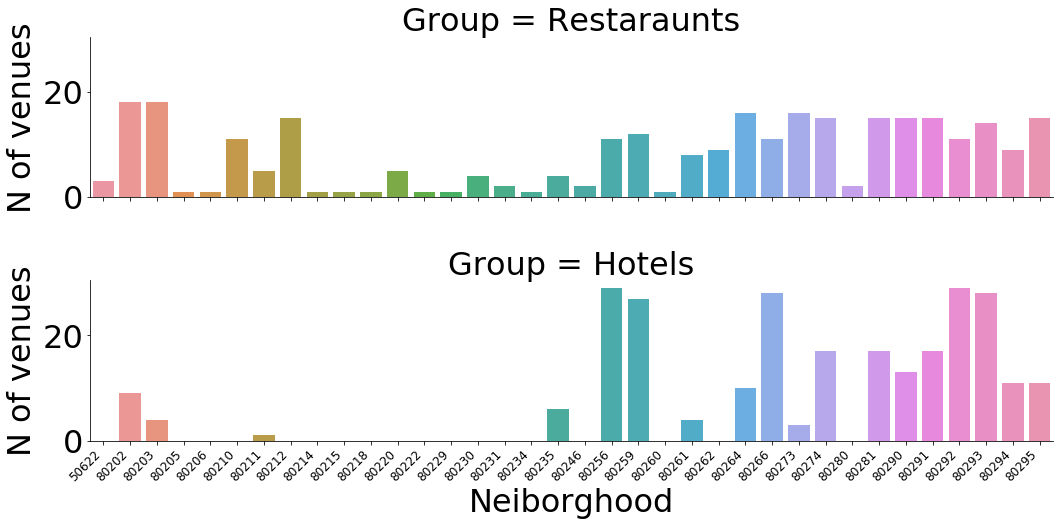

In [51]:
## see how data looks like
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
#ax = sns.FacetGrid(data = den_all_gr,row='Group',sharex=False)
ax = sns.catplot(x="Neighborhood",y="Venue" ,data = den_all_gr, kind="bar", height=4, aspect=4,row='Group')
ax.set_axis_labels("Neiborghood","N of venues")


rc={'font.size': 32, 'axes.labelsize': 32, 'legend.fontsize': 32.0, 
    'axes.titlesize': 32, 'xtick.labelsize': 32, 'ytick.labelsize': 32}
plt.rcParams.update(**rc)
plt.xticks(rotation=45, ha='right',fontsize=12)

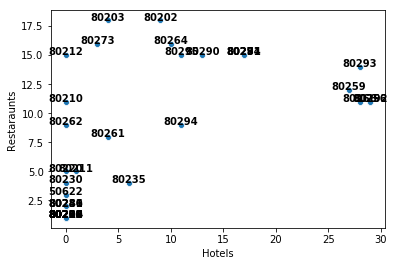

In [74]:
## see correlation between number of restaraunts and hotels
den_all_gr_wide= den_all_gr.pivot(index='Neighborhood', columns='Group', values='Venue').reset_index()
den_all_gr_wide = den_all_gr_wide.fillna(0)

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
st = sns.scatterplot(x="Hotels",y="Restaraunts" ,data = den_all_gr_wide)
#ax.set_axis_labels("Neiborghood","N of venues")


rc={'font.size': 10, 'axes.labelsize': 10, 'legend.fontsize': 10, 
   'axes.titlesize': 10, 'xtick.labelsize': 10, 'ytick.labelsize': 10}
#plt.rcParams.update(**rc)
for line in range(0,den_all_gr_wide.shape[0]):
     st.text(den_all_gr_wide.Hotels[line], den_all_gr_wide.Restaraunts[line], den_all_gr_wide.Neighborhood[line], horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.rcParams.update(**rc)

## Step 5: cluter analysis

In [107]:
#replace NA by 0
den_venues_allx=den_venues_all.drop(['Venue Category','Neighborhood Latitude','Neighborhood Longitude'],axis=1)
den_venues_count= den_venues_allx.groupby(['Neighborhood','Group']).count().reset_index()
den_count_wide=den_venues_count.pivot(index='Neighborhood', columns='Group', values='Venue').reset_index()
#den_grouped=den_venues_all.pivot(index=['Neighborhood','Neighborhood Latitude','Neighborhood Longitude'], columns='Venue Category', values='Venue')
import numpy as np
den_count_wide[np.isnan(den_count_wide)] = 0
den_count_wide

Group,Neighborhood,Hotels,Restaraunts
0,50622,0.0,3.0
1,80202,9.0,18.0
2,80203,4.0,18.0
3,80205,0.0,1.0
4,80206,0.0,1.0
5,80210,0.0,11.0
6,80211,1.0,5.0
7,80212,0.0,15.0
8,80214,0.0,1.0
9,80215,0.0,1.0


In [101]:
### cluster data
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 2

den_grouped_clustering = den_count_wide.drop(['Neighborhood'], 1)
den_grouped_clustering = den_count_wide.drop(den_count_wide.columns[0],axis=1)
#den_grouped.columns.values
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(den_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_#[0:10] 

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [109]:
# add clustering labels
#den_count_wide['Neighborhood']=den_count_wide.index.values
den_count_wide_2=den_count_wide#.insert(0, 'Cluster Labels', kmeans.labels_)
den_count_wide_2['Zip']=den_count_wide_2['Neighborhood']
den_merged = den_data #den_venues_2
den_merged = den_merged.join(den_count_wide.set_index('Zip'), on='Zip')
den_merged['Cluster Labels'] = den_merged['Cluster Labels'].fillna(2)
den_merged=den_merged.fillna(0) ## 2 - districts with no cafes
den_merged['Cluster Labels']=(den_merged['Cluster Labels']).astype(int)
den_merged

,Zip,Latitude,Longitude,Cluster Labels,Neighborhood,Hotels,Restaraunts
186,80235,39.648328,-105.084310,0,80235.0,6.0,4.0
243,80202,39.751586,-104.996990,1,80202.0,9.0,18.0
584,80230,39.721763,-104.896270,0,80230.0,0.0,4.0
787,64441,40.386181,-94.289750,2,0.0,0.0,0.0
834,80266,39.747179,-104.991511,1,80266.0,28.0,11.0
1090,28037,35.501448,-81.004120,2,0.0,0.0,0.0
2615,80238,39.738752,-104.408349,2,0.0,0.0,0.0
3039,80216,39.784622,-104.962140,2,0.0,0.0,0.0
3274,80232,39.690387,-105.088660,2,0.0,0.0,0.0
3797,80221,39.816536,-105.011230,2,0.0,0.0,0.0


In [110]:

# create map
map_clusters = folium.Map(location=[39.742043,  -104.991531], zoom_start=11)

import matplotlib.cm as cm
import matplotlib.colors as colors

# set color scheme for the clusters
x = np.arange(kclusters+1)
ys = [i + x + (i*x)**2 for i in range(kclusters+1)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow =['#0000FF','#FF0000','#000000','#808080'] # [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(den_merged['Latitude'], den_merged['Longitude'], den_merged['Zip'], den_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## explore clusters

In [113]:
merged_lf = pd.melt(den_merged,
             id_vars=['Cluster Labels','Zip'],
             value_vars = ['Restaraunts', 'Hotels'],
             var_name = 'Category',
             value_name = 'Count')
merged_lf

,Cluster Labels,Zip,Category,Count
0,0,80235,Restaraunts,4.0
1,1,80202,Restaraunts,18.0
2,0,80230,Restaraunts,4.0
3,2,64441,Restaraunts,0.0
4,1,80266,Restaraunts,11.0
5,2,28037,Restaraunts,0.0
6,2,80238,Restaraunts,0.0
7,2,80216,Restaraunts,0.0
8,2,80232,Restaraunts,0.0
9,2,80221,Restaraunts,0.0


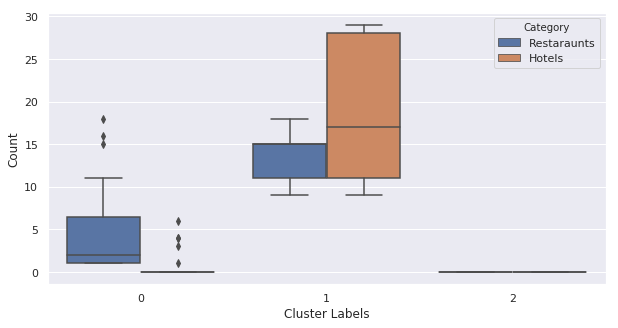

In [123]:

p = sns.boxplot(data=merged_lf,
                x = 'Cluster Labels',
                y = 'Count',
                hue='Category')
sns.set(rc={'figure.figsize':(10,5)})

cluster 0 - few hotels and mean number of restaraunts
cluster 1 - American and Mexican restarants
cluster 2 - nothing